In [1]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

In [2]:
df1 = pd.read_csv('patients.csv')
df2 = pd.read_csv('observations.csv', parse_dates=['DATE'])
df_al = df1.merge(df2, left_on = 'Id', right_on = 'PATIENT')
df_al.head()

,Id,BIRTHDATE,DEATHDATE,SSN,DRIVERS,PASSPORT,PREFIX,FIRST,LAST,SUFFIX,...,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE,DATE,PATIENT,ENCOUNTER,CODE,DESCRIPTION,VALUE,UNITS,TYPE
0,1d604da9-9a81-4ba9-80c2-de3375d59b40,1989-05-25,NaN,999-76-6866,S99984236,X19277260X,Mr.,José Eduardo181,Gómez206,NaN,...,271227.08,1334.88,2011-07-28 15:02:18+00:00,1d604da9-9a81-4ba9-80c2-de3375d59b40,b85c339a-6076-43ed-b9d0-9cf013dec49d,8302-2,Body Height,181.0,cm,numeric
1,1d604da9-9a81-4ba9-80c2-de3375d59b40,1989-05-25,NaN,999-76-6866,S99984236,X19277260X,Mr.,José Eduardo181,Gómez206,NaN,...,271227.08,1334.88,2011-07-28 15:02:18+00:00,1d604da9-9a81-4ba9-80c2-de3375d59b40,b85c339a-6076-43ed-b9d0-9cf013dec49d,72514-3,Pain severity - 0-10 verbal numeric rating [Sc...,3.0,{score},numeric
2,1d604da9-9a81-4ba9-80c2-de3375d59b40,1989-05-25,NaN,999-76-6866,S99984236,X19277260X,Mr.,José Eduardo181,Gómez206,NaN,...,271227.08,1334.88,2011-07-28 15:02:18+00:00,1d604da9-9a81-4ba9-80c2-de3375d59b40,b85c339a-6076-43ed-b9d0-9cf013dec49d,29463-7,Body Weight,65.8,kg,numeric
3,1d604da9-9a81-4ba9-80c2-de3375d59b40,1989-05-25,NaN,999-76-6866,S99984236,X19277260X,Mr.,José Eduardo181,Gómez206,NaN,...,271227.08,1334.88,2011-07-28 15:02:18+00:00,1d604da9-9a81-4ba9-80c2-de3375d59b40,b85c339a-6076-43ed-b9d0-9cf013dec49d,39156-5,Body Mass Index,20.1,kg/m2,numeric
4,1d604da9-9a81-4ba9-80c2-de3375d59b40,1989-05-25,NaN,999-76-6866,S99984236,X19277260X,Mr.,José Eduardo181,Gómez206,NaN,...,271227.08,1334.88,2011-07-28 15:02:18+00:00,1d604da9-9a81-4ba9-80c2-de3375d59b40,b85c339a-6076-43ed-b9d0-9cf013dec49d,8462-4,Diastolic Blood Pressure,83.0,mm[Hg],numeric


In [3]:
dt_stop = df_al['DATE'].dropna()
dt_stop = dt_stop.unique()
dt_stop

<DatetimeArray>
['2011-07-28 15:02:18+00:00', '2014-07-31 15:02:18+00:00',
 '2017-08-03 15:02:18+00:00', '2010-05-25 15:02:18+00:00',
 '2011-05-25 15:02:18+00:00', '2012-05-25 15:02:18+00:00',
 '2013-05-25 15:02:18+00:00', '2014-05-25 15:02:18+00:00',
 '2015-05-25 15:02:18+00:00', '2016-05-25 15:02:18+00:00',
 ...
 '2010-09-05 16:27:52+00:00', '2011-09-05 16:27:52+00:00',
 '2012-09-05 16:27:52+00:00', '2013-09-05 16:27:52+00:00',
 '2014-09-05 16:27:52+00:00', '2015-09-05 16:27:52+00:00',
 '2016-09-05 16:27:52+00:00', '2017-09-05 16:27:52+00:00',
 '2018-09-05 16:27:52+00:00', '2019-09-05 16:27:52+00:00']
Length: 29074, dtype: datetime64[ns, UTC]

In [4]:
df_al['DATE'] = df_al['DATE'].replace(dt_stop, np.full(len(dt_stop), 1))
df_al['DATE'] = df_al['DATE'].replace({pd.NaT: "0"})
df_al['DATE']

0         1
1         1
2         1
3         1
4         1
         ..
299692    1
299693    1
299694    1
299695    1
299696    1
Name: DATE, Length: 299697, dtype: int64

In [5]:
contigency = pd.crosstab(df_al['DATE'], df_al['DESCRIPTION'])
contigency

DESCRIPTION,Abuse Status [OMAHA],Alanine aminotransferase [Enzymatic activity/volume] in Serum or Plasma,Albumin [Mass/volume] in Serum or Plasma,Alkaline phosphatase [Enzymatic activity/volume] in Serum or Plasma,American house dust mite IgE Ab in Serum,Appearance of Urine,Are you covered by health insurance or some other kind of health care plan [PhenX],Aspartate aminotransferase [Enzymatic activity/volume] in Serum or Plasma,Bilirubin.total [Mass/volume] in Serum or Plasma,Bilirubin.total [Mass/volume] in Urine by Test strip,...,Tumor marker Cancer,US Guidance for biopsy of Prostate,Urea Nitrogen,WBC Auto (Bld) [#/Vol],Walnut IgE Ab in Serum,Weight difference [Mass difference] --pre dialysis - post dialysis,Weight-for-length Per age and sex,Wheat IgE Ab in Serum,White oak IgE Ab in Serum,pH of Urine by Test strip
DATE,,,,,,,,,,,,,,,,,,,,,
1,83,1927,1927,1927,78,716,83,1927,1927,716,...,1,37,6515,81,78,3388,1615,78,78,716


<AxesSubplot:xlabel='DESCRIPTION', ylabel='DATE'>

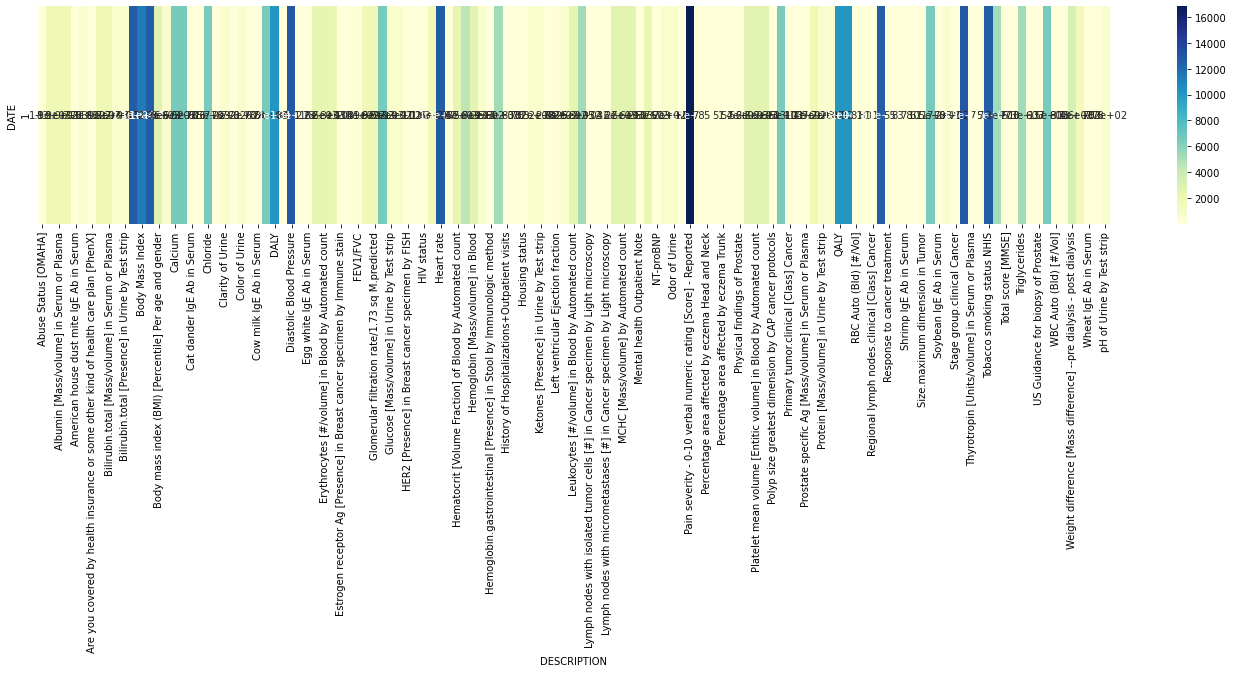

In [6]:
plt.figure(figsize=(24,4))
sns.heatmap(contigency, annot=True, cmap="YlGnBu")

In [7]:
c, p, dof, expected = chi2_contingency(contigency)
p

1.0

In [8]:
features_column = ['RACE', 'ETHNICITY', 'GENDER', 'DESCRIPTION']
label_column = ['DATE']

In [9]:
dataset = df_al[features_column + label_column]
dataset['DATE'] = dataset['DATE'].astype('int32')

#reference for numerical categories
categorical_dict = {}

#convert categorical data into numerical data
for feature_name in features_column:
    dataset[feature_name] = dataset[feature_name].astype('category')
    categorical_dict.update({feature_name: dataset[feature_name].cat.categories})
    dataset[feature_name] = dataset[feature_name].astype('category').cat.codes
    
print(categorical_dict)

{'RACE': Index(['asian', 'black', 'native', 'other', 'white'], dtype='object'), 'ETHNICITY': Index(['hispanic', 'nonhispanic'], dtype='object'), 'GENDER': Index(['F', 'M'], dtype='object'), 'DESCRIPTION': Index(['Abuse Status [OMAHA]',
       'Alanine aminotransferase [Enzymatic activity/volume] in Serum or Plasma',
       'Albumin [Mass/volume] in Serum or Plasma',
       'Alkaline phosphatase [Enzymatic activity/volume] in Serum or Plasma',
       'American house dust mite IgE Ab in Serum', 'Appearance of Urine',
       'Are you covered by health insurance or some other kind of health care plan [PhenX]',
       'Aspartate aminotransferase [Enzymatic activity/volume] in Serum or Plasma',
       'Bilirubin.total [Mass/volume] in Serum or Plasma',
       'Bilirubin.total [Mass/volume] in Urine by Test strip',
       ...
       'Tumor marker Cancer', 'US Guidance for biopsy of Prostate',
       'Urea Nitrogen', 'WBC Auto (Bld) [#/Vol]', 'Walnut IgE Ab in Serum',
       'Weight difference

<ipython-input-9-ad9e2bfc53a5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['DATE'] = dataset['DATE'].astype('int32')
<ipython-input-9-ad9e2bfc53a5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset[feature_name] = dataset[feature_name].astype('category')
<ipython-input-9-ad9e2bfc53a5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

In [10]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [11]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('DATE')
test_labels = test_features.pop('DATE')

In [12]:
def build_and_compile_model():
  model = keras.Sequential([
      layers.Dense(len(features_column)),
      layers.Dense(64, activation = 'relu'),
      layers.Dense(1)
  ])

  model.compile(loss = 'mean_absolute_error', metrics = ['accuracy'],
                optimizer = 'adam')
  return model

In [13]:
model = build_and_compile_model()

In [14]:
#fit the model
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=3,
                                            mode='min')
history = model.fit(
    train_features[features_column],
    train_labels,
    validation_split=0.2,
    callbacks=early_stopping,
    verbose=1, epochs=100)

Epoch 1/100
5994/5994 [==============================] - 4s 532us/step - loss: 0.0635 - accuracy: 0.9977 - val_loss: 0.0173 - val_accuracy: 1.0000
Epoch 2/100
5994/5994 [==============================] - 3s 537us/step - loss: 0.0389 - accuracy: 1.0000 - val_loss: 0.0444 - val_accuracy: 1.0000
Epoch 3/100
5994/5994 [==============================] - 3s 497us/step - loss: 0.0206 - accuracy: 1.0000 - val_loss: 0.0156 - val_accuracy: 1.0000
Epoch 4/100
5994/5994 [==============================] - 3s 492us/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 5/100
5994/5994 [==============================] - 3s 494us/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 7.5329e-04 - val_accuracy: 1.0000
Epoch 6/100
5994/5994 [==============================] - 3s 495us/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 6.9860e-04 - val_accuracy: 1.0000
Epoch 7/100
5994/5994 [==============================] - 3s 495us/step - loss: 0.0014 - accuracy: 1.0000 - val

In [15]:
model.evaluate(test_features[features_column], test_labels)

1874/1874 [==============================] - 1s 366us/step - loss: 3.9919e-04 - accuracy: 1.0000


[0.0003991905541624874, 1.0]

In [16]:
model.save('model_observations')

INFO:tensorflow:Assets written to: model_observations\assets
